In [428]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from os import listdir

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

import my_func
import importlib
importlib.reload(my_func)

&lt;module &#39;my_func&#39; from &#39;c:\\Users\\Evgen\\skillfactory\\Projects\\Project_4\\my_func.py&#39;&gt;

In [429]:
RANDOM_SEED = 42

In [430]:
from main import df_scrolling_object
import importlib
importlib.reload(main)
data_obj = df_scrolling_object()
X, Y = data_obj.return_XY()

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RANDOM_SEED)

roc_auc=0.677348  C=1  penalty=l2 solver=newton-cg


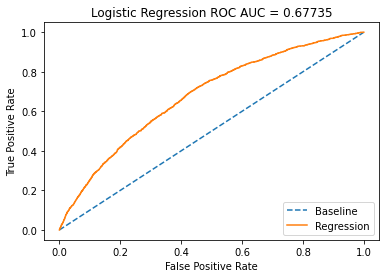

In [432]:
C = 1
penalty = 'l2'
solver = 'newton-cg'

model = LogisticRegression(C=C, penalty=penalty, solver=solver)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
probs = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title(f'Logistic Regression ROC AUC = {roc_auc:.5f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

print(f'roc_auc={round(roc_auc, 6)}  C={C}  penalty={penalty} solver={solver}')

roc_auc=0.677348  C=1  penalty=l2 solver=newton-cg   
roc_auc = 0.67734 C = 1 penalty = l2  
roc_auc = 0.677361  C = 1  penalty = l2

In [433]:
print(confusion_matrix(y_test, y_pred))

print(f'f1 test {f1_score(y_test, y_pred)}')
print(f'f1 train {f1_score(y_train, y_pred_train)}')

[[12928     5]
 [ 1822     5]]
f1 test 0.005443658138268917
f1 train 0.006314958558084463


&lt;AxesSubplot:&gt;

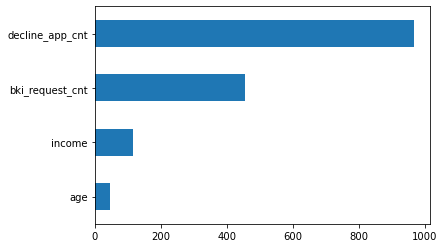

In [434]:
data = data_obj.data
imp_num = Series(f_classif(data[data_obj.num_cols], data['default'])[0], index = data_obj.num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [435]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=10, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params())
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: {&#39;C&#39;: 1.0, &#39;class_weight&#39;: None, &#39;dual&#39;: False, &#39;fit_intercept&#39;: True, &#39;intercept_scaling&#39;: 1, &#39;l1_ratio&#39;: None, &#39;max_iter&#39;: 100, &#39;multi_class&#39;: &#39;auto&#39;, &#39;n_jobs&#39;: None, &#39;penalty&#39;: &#39;l2&#39;, &#39;random_state&#39;: None, &#39;solver&#39;: &#39;newton-cg&#39;, &#39;tol&#39;: 0.0001, &#39;verbose&#39;: 0, &#39;warm_start&#39;: False}
Лучшее C: 1.0


In [436]:
# data = data_obj.data
# n1 = data[data.default==1].shape[0]
# data_0 = data[data.default==0]
# data_1 = data[data.default==1]
# data_balanced = data_0[:n1].append(data_1)

# X = data_balanced.drop('default', axis=1)
# Y = data_balanced['default']

# X, Y = data_obj.return_bal_XY(2)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# C = 7.742636826811269
# penalty = 'l2'
# solver = 'liblinear'

# model = LogisticRegression(C=C, penalty=penalty, solver=solver)
# model.fit(X_train, y_train)

# probs = model.predict_proba(X_test)
# probs = probs[:,1]

# fpr, tpr, threshold = roc_curve(y_test, probs)
# roc_auc = roc_auc_score(y_test, probs)

# plt.figure()
# plt.plot([0, 1], label='Baseline', linestyle='--')
# plt.plot(fpr, tpr, label = 'Regression')
# plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc = 'lower right')

# print(f'roc_auc = {round(roc_auc, 6)}  C = {C}  penalty = {penalty}')

In [437]:
# for data_col in data_obj.num_cols:
#     my_func.get_boxplot(data_obj.data, 'default', data_col)

In [438]:
data = data_obj.data
data.groupby(by='default')[data_obj.num_cols].mean()#agg(lambda x: x.value_counts().index[0])



,age,decline_app_cnt,bki_request_cnt,income
default,,,,
0,39.390504,0.240877,1.933134,41799.713288
1,38.525395,0.515472,2.462335,36288.113316


In [439]:
# data[data.default==1].decline_app_cnt.sort_values(ascending=False).head(50)
# def outlier_treatment(datacolumn):
#     sorted(datacolumn)
#     Q1,Q3 = np.percentile(datacolumn , [25,75])
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)
#     return lower_range, upper_range

# print(outlier_treatment(data[data.default==1].decline_app_cnt))

# data.decline_app_cnt.sort_values(ascending=False).head(50)


# # data[(data.default==1)][data_obj.cat_cols].hist()
# data[data.default==1].shape
# data[(data.default==1)]['education'].hist()

roc_auc=0.667132  C=1  penalty=l2 solver=newton-cg


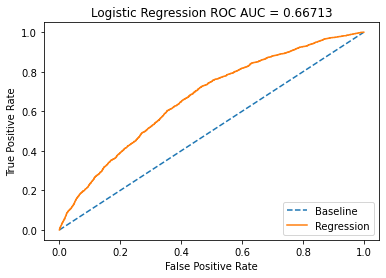

In [446]:
C = 1
penalty = 'l2'
solver = 'newton-cg'

clf = LogisticRegressionCV(Cs=1, cv=5, solver=solver).fit(X_train, y_train)
clf.predict(X_test)
probs = clf.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title(f'Logistic Regression ROC AUC = {roc_auc:.5f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

print(f'roc_auc={round(roc_auc, 6)}  C={C}  penalty={penalty} solver={solver}')